In [1]:
from scipy import stats as st

import pandas as pd

import numpy as np

In [2]:
calls = pd.read_csv("C://Users\\Igor\\Desktop\\data_analyst\\3 project\\calls.csv")
internet = pd.read_csv("C://Users\\Igor\\Desktop\\data_analyst\\3 project\\internet.csv")
messages = pd.read_csv("C://Users\\Igor\\Desktop\\data_analyst\\3 project\\messages.csv")
tariffs = pd.read_csv("C://Users\\Igor\\Desktop\\data_analyst\\3 project\\tariffs.csv")
users = pd.read_csv("C://Users\\Igor\\Desktop\\data_analyst\\3 project\\users.csv")

### Шаг 1 - просмотрим и изучим данные, найдем ошибки, создадим доп. столбцы

#### 1.1 Calls

In [3]:
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [4]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [5]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')

In [6]:
calls['month'] = calls['call_date'].dt.month

In [7]:
calls['duration'] = np.round(calls['duration'], decimals=0)

In [8]:
calls['duration'].sum()

1368261.0

#### 1.2 Internet

In [9]:
internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [10]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [11]:
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')

In [12]:
internet['month'] = internet['session_date'].dt.month

#### 1.3 Messages

In [13]:
messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [14]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [15]:
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')

In [16]:
messages['month'] = messages['message_date'].dt.month

#### 1.4 Tariffs

In [17]:
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


#### 1.5 Users

In [18]:
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [19]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [20]:
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')

### Шаг 2 - Подготовка данных

In [21]:
def Group(data,value,type_):
    t = pd.DataFrame()
    if (type_):
        t['value'] = data.groupby(['month','user_id'])[value].sum()
    else: 
        t['value'] = data.groupby(['month','user_id'])[value].count()
    t.columns = [value]
    t = t.reset_index(level=0).reset_index(level=0)
    return t

#### 2.1 Создаем датафрэйм с потрачеными минутами в месяц

In [22]:
calls_new = Group(calls, 'duration', True)
calls_new

,user_id,month,duration
0,1005,1,92.0
1,1032,1,360.0
2,1045,1,8.0
3,1055,1,526.0
4,1071,1,185.0
...,...,...,...
3169,1494,12,390.0
3170,1495,12,973.0
3171,1496,12,484.0
3172,1497,12,516.0


#### 2.2 Создаем датафрэйм с потраченым интернетом в месяц

In [23]:
internet_new = Group(internet, 'mb_used', True)
internet_new

,user_id,month,mb_used
0,1005,1,2727.97
1,1032,1,24127.69
2,1045,1,2346.71
3,1055,1,17090.88
4,1071,1,15604.34
...,...,...,...
3198,1494,12,17621.21
3199,1495,12,23426.76
3200,1496,12,20736.15
3201,1497,12,19918.60


#### 2.3 - Создаем датафрэйм с отправленными СМС в месяц

In [24]:
messages_new = Group(messages, 'id', False)
messages_new.columns = ['user_id','month','messages']
messages_new

,user_id,month,messages
0,1005,1,7
1,1032,1,38
2,1045,1,5
3,1055,1,30
4,1071,1,16
...,...,...,...
2712,1493,12,78
2713,1495,12,84
2714,1496,12,51
2715,1497,12,17


#### 2.4 Создадим таблицу для объединения всех созданных датафрэймов

In [25]:
#Наполняем новую таблицу подготовленными данными данными
table = pd.DataFrame(users['user_id'])
table = table.join(calls_new.set_index(['user_id']), on=['user_id'], how='outer')
table = table.join(messages_new.set_index(['user_id','month']), on=['user_id','month'], how='outer')
table = table.join(internet_new.set_index(['user_id','month']), on=['user_id','month'], how='outer')
table_tariff = pd.DataFrame(users, columns=['user_id','tariff','city'])
table = table.join(table_tariff.set_index(['user_id']),on=['user_id'], how='left')
table.reset_index(drop= True , inplace= True )

In [26]:
table

,user_id,month,duration,messages,mb_used,tariff,city
0,1000,5.0,149.0,22.0,2253.49,ultra,Краснодар
1,1000,6.0,159.0,60.0,23233.77,ultra,Краснодар
2,1000,7.0,319.0,75.0,14003.64,ultra,Краснодар
3,1000,8.0,391.0,81.0,14055.93,ultra,Краснодар
4,1000,9.0,439.0,57.0,14568.91,ultra,Краснодар
...,...,...,...,...,...,...,...
3217,1231,12.0,NaN,191.0,32448.00,ultra,Чебоксары
3218,1328,12.0,NaN,7.0,39419.73,ultra,Мурманск
3219,1473,12.0,NaN,20.0,18418.26,ultra,Красноярск
3220,1489,12.0,NaN,35.0,17322.51,smart,Санкт-Петербург


#### 2.5 Посчитаем помесячную выручку с кажого абонента

In [27]:
#Функция подсчета трат абонента для каждого месяца
def Receipts(tariff, mb_used, duration, messages):
    def notOver(value):
        if (value < 0):
            return 0
        else:
            return value
        
    if(tariff == 'smart'):
        tariff_id = 0
    else:
        tariff_id = 1
    base_tariff_price = tariffs.loc[tariff_id, 'rub_monthly_fee']
    internet_receipts_month = (mb_used - tariffs.loc[tariff_id, 'mb_per_month_included']) * tariffs.loc[tariff_id, 'rub_per_gb'] / 1024
    calls_receipts_month = (duration - tariffs.loc[tariff_id, 'minutes_included']) * tariffs.loc[tariff_id, 'rub_per_minute']
    messages_receipts_month = (duration - tariffs.loc[tariff_id, 'messages_included']) * tariffs.loc[tariff_id, 'rub_per_message']
    return np.nansum([notOver(internet_receipts_month), notOver(calls_receipts_month), notOver(messages_receipts_month),base_tariff_price])

In [28]:
#Вызов функции нахождения трат для всех абонентов
table['receipts'] = table.apply(lambda x: Receipts(x.tariff,x.mb_used ,x.duration ,x.messages), axis = 1)

In [29]:
table = table.sort_values('user_id')
table['receipts'] = np.round(table['receipts'], decimals = 0)
table

,user_id,month,duration,messages,mb_used,tariff,city,receipts
0,1000,5.0,149.0,22.0,2253.49,ultra,Краснодар,1950.0
1,1000,6.0,159.0,60.0,23233.77,ultra,Краснодар,1950.0
2,1000,7.0,319.0,75.0,14003.64,ultra,Краснодар,1950.0
3,1000,8.0,391.0,81.0,14055.93,ultra,Краснодар,1950.0
4,1000,9.0,439.0,57.0,14568.91,ultra,Краснодар,1950.0
...,...,...,...,...,...,...,...,...
3176,1498,9.0,447.0,44.0,22134.41,smart,Владикавказ,3064.0
3179,1499,10.0,429.0,48.0,17788.51,smart,Пермь,2161.0
3180,1499,11.0,574.0,59.0,17963.31,smart,Пермь,2852.0
3178,1499,9.0,64.0,11.0,1845.75,smart,Пермь,592.0


### Шаг 3 - анализ данных

Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Посчитайте среднее количество, дисперсию и стандартное отклонение. Постройте гистограммы. Опишите распределения.

In [30]:
smart_stat = table.query('tariff == "smart"')
ultra_stat = table.query('tariff == "ultra"')
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


#### 3.1 Данные по звонкам

smart
Среднее значение =  395.3328834907782
Дисперсия =  32013.21982285958
Стандартное отклонение =  178.9223849127313


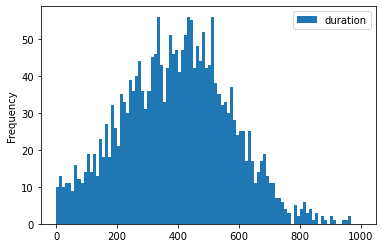

In [31]:
smart_stat.plot(y='duration', kind='hist', bins=100,range=(0,1000))
print('smart')
print('Среднее значение = ',smart_stat['duration'].mean())
print('Дисперсия = ', np.var(smart_stat['duration']))
print('Стандартное отклонение = ', np.std(smart_stat['duration']))

ultra
Среднее значение =  514.6540483701367
Дисперсия =  83797.18315658662
Стандартное отклонение =  289.4774311696624


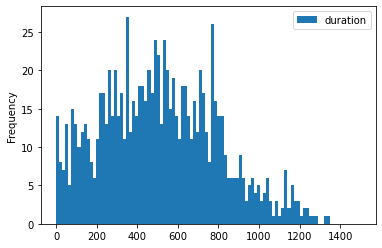

In [32]:
ultra_stat.plot(y='duration', kind='hist', bins=100,range=(0,1500))
print('ultra')
print('Среднее значение = ',ultra_stat['duration'].mean())
print('Дисперсия = ', np.var(ultra_stat['duration']))
print('Стандартное отклонение = ', np.std(ultra_stat['duration']))

### Вывод: 
#### Smart. нормальное распредление, в среднем пользователи на 26% расходуют меньше минут, чем есть в тарифе
#### Ultra. нормальное распределение, в среднем пользователи на 83% расходуют меньше минут, чем есть в тарифе

Smart
Среднее значение =  16215.661849192107
Дисперсия =  34344529.80091769
Стандартное отклонение =  5860.420616382215


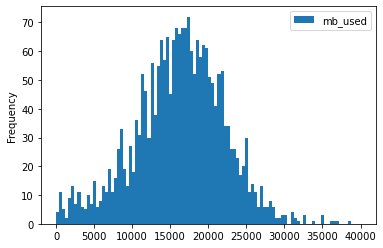

In [33]:
smart_stat.plot(y='mb_used', kind='hist', bins=100,range=(0,40000))
print("Smart")
print('Среднее значение = ',smart_stat['mb_used'].mean())
print('Дисперсия = ', np.var(smart_stat['mb_used']))
print('Стандартное отклонение = ', np.std(smart_stat['mb_used']))

Ultra
Среднее значение =  19668.48526153848
Дисперсия =  98762849.7229364
Стандартное отклонение =  9937.949975872107


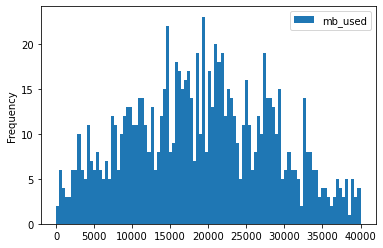

In [34]:
ultra_stat.plot(y='mb_used', kind='hist', bins=100,range=(0,40000))
print("Ultra")
print('Среднее значение = ',ultra_stat['mb_used'].mean())
print('Дисперсия = ', np.var(ultra_stat['mb_used']))
print('Стандартное отклонение = ', np.std(ultra_stat['mb_used']))

### Вывод: 
#### Smart. Нормальное распределение, в среднем пользователи расходуют на 7% больше трафика чем есть в тарифе
#### Ultra. Нормальное распределение, в среднем пользователи расходуют на 36% больше трафика чем есть в тарифе

Smart
Среднее значение =  38.71644120707596
Дисперсия =  717.2208431102251
Стандартное отклонение =  26.780979129042784


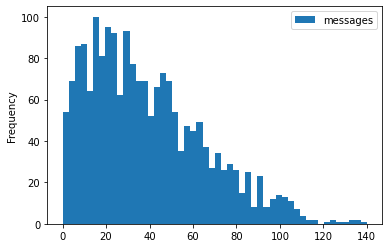

In [35]:
smart_stat.plot(y='messages', kind='hist', bins=50,range=(0,140))
print('Smart')
print('Среднее значение = ',smart_stat['messages'].mean())
print('Дисперсия = ', np.var(smart_stat['messages']))
print('Стандартное отклонение = ', np.std(smart_stat['messages']))

Ultra
Среднее значение =  61.161006289308176
Дисперсия =  2107.005523515688
Стандартное отклонение =  45.90212983637783


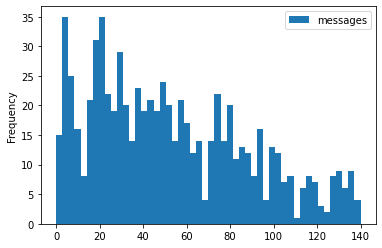

In [36]:
ultra_stat.plot(y='messages', kind='hist', bins=50,range=(0,140))
print('Ultra')
print('Среднее значение = ',ultra_stat['messages'].mean())
print('Дисперсия = ', np.var(ultra_stat['messages']))
print('Стандартное отклонение = ', np.std(ultra_stat['messages']))

### Вывод: 
#### Smart. Распределение Пуассона, в среднем пользователи на используют смс на 30% меньше, чем есть в тарифе
#### Ultra. Распределение Пуассона, в среднем пользователи на используют смс на 94% меньше, чем есть в тарифе

### Шаг 4 - проверка гипотиз

In [37]:
def Hipothesis(table1, table2, alpha):
    result = st.ttest_ind(table1['receipts'], table2['receipts'],equal_var = False)
    print('p-value = ',result.pvalue)
    if (result.pvalue < alpha):
        print("Можно отвергнуть гипотезу")
    else:
        print("Нельзя отвергать гипотезу")

### 4.1 Гипотеза: средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются
##### Гипотеза Н0 - средняя выручка пользователей тарифов "Ульра" и "Смарт" не различаются 
##### Гипотеза Н1 - средняя выручка пользователей тарифов "Ульра" и "Смарт" различаются 
##### Уровень статистической значимости примем 5%

In [38]:
Hipothesis(smart_stat, ultra_stat, 0.05)

p-value =  1.2662659892969787e-08
Можно отвергнуть гипотезу


### Вывод: мы отвергаем гипотезу Н0 и принимаем гипотезу Н1 - средняя выручка пользователей разных тарифов различается

### 4.2 Гипотеза: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.
##### Гипотеза Н0 - средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов.
##### Гипотеза Н1 - средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.
##### Уровень статистической значимости примем 5%

In [39]:
moscow_stat = table.query('city == "Москва"')
otherCity_stat = table.query('city != "Москва"')

In [40]:
Hipothesis(moscow_stat,otherCity_stat,0.05)

p-value =  0.23365371707501129
Нельзя отвергать гипотезу


### Вывод: мы не отвергаем гипотезу Н0 - средняя выручка пользователей из Москвы не отличается от выручки пользователей других регионов